# Sentiment Analysis of Financial News

The data source is available at [Kaggle](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news?resource=download). 

**Context**: This dataset (FinancialPhraseBank) contains the sentiments for financial news headlines from the perspective of a retail investor.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd()

'D:\\Data\\PyCharmProjects\\MAS-sentiment-analysis\\sent_analysis'

In [14]:
# data = pd.read_csv('../MAS-sentiment-analysis/data/financial_news.csv')
data = pd.read_csv("D:\Data\PyCharmProjects\MAS-sentiment-analysis\data/financial_news.csv", names=['sentiment', 'news'])
data.sample(10)

,sentiment,news
3868,neutral,The net sales of the Power Plants business wer...
3519,neutral,"ALEXANDRIA , Va. , Nov. 19 -- Erkki Aho , Elim..."
3729,neutral,Renesas Mobile Europe Ltd has approximately 47...
2889,neutral,Financial details were not disclosed .
4298,neutral,`` We have a license agreement with Nokia Corp...
1701,neutral,Yara Suomi Ltd also provides nitrogen chemical...
1627,neutral,"The deal , already approved by shareholders , ..."
357,positive,"Operating profit totaled EUR 825mn , up from E..."
1867,positive,The iTunes-based material will be accessible o...
139,neutral,A structures BIM ( building information modeli...


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   news       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


Our dataframe consists of 4,846 rows with just two columns i.e sentiment and news.

## Data Analysis

In [19]:
data[['sentiment']].value_counts()

sentiment
neutral      2879
positive     1363
negative      604
Name: count, dtype: int64

In [20]:
value_counts = data['sentiment'].value_counts(normalize=True) * 100  # Get percentages
count_with_percentages = data['sentiment'].value_counts().to_frame('counts')  # Get counts
count_with_percentages['percentage'] = value_counts  # Add percentages to the DataFrame

print(count_with_percentages)

           counts  percentage
sentiment                    
neutral      2879   59.409823
positive     1363   28.126290
negative      604   12.463888


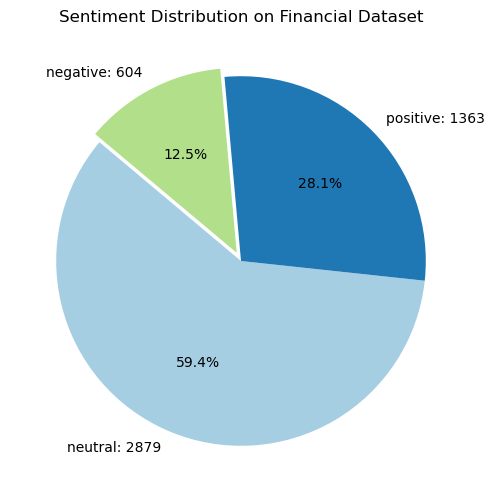

In [30]:
# Calculate counts and percentages
value_counts = data['sentiment'].value_counts()
percentages = value_counts / value_counts.sum() * 100

# Create labels with both values and percentages
labels = [f'{label}: {count}' for label, count in zip(value_counts.index, value_counts)]

# Define the explode parameter to separate the "negative" slice
explode = [0.05 if label == 'negative' else 0 for label in value_counts.index]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode)
plt.title('Sentiment Distribution on Financial Dataset')
plt.show()

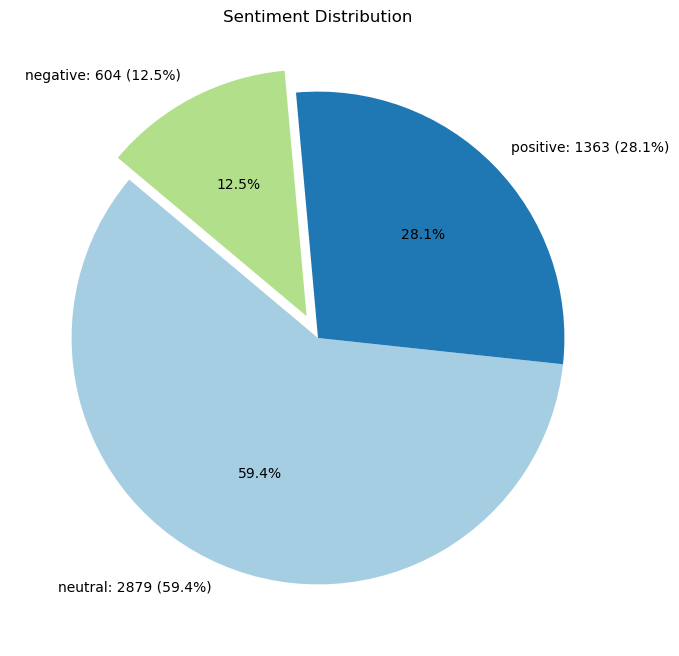